In [11]:
import pandas as pd
df = pd.read_excel("base_satisfaction_clients.xlsx")
df.head()

,ID_Commande,Date_Commande,Produit,Catégorie,Prix_unitaire,Quantité,Date_Livraison,Statut_Livraison,Note_Client,Commentaire_Client
0,C001,2024-02-18,Chaussures,Mode,9233,1,2024-02-24,En retard,4,Excellent service
1,C002,2024-01-07,Chaussures,Mode,1864,1,2024-01-11,Livré,3,Excellent service
2,C003,2024-01-07,Batterie,Électronique,5920,3,2024-01-13,En retard,2,Excellent service
3,C004,2024-01-03,Smartphone,Électronique,2468,1,2024-01-08,Livré,2,Mauvais produit
4,C005,2024-02-13,Montre,Mode,7304,4,2024-02-15,Livré,5,Mauvais produit


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID_Commande         50 non-null     object        
 1   Date_Commande       50 non-null     datetime64[ns]
 2   Produit             50 non-null     object        
 3   Catégorie           50 non-null     object        
 4   Prix_unitaire       50 non-null     int64         
 5   Quantité            50 non-null     int64         
 6   Date_Livraison      50 non-null     datetime64[ns]
 7   Statut_Livraison    50 non-null     object        
 8   Note_Client         50 non-null     int64         
 9   Commentaire_Client  50 non-null     object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 4.0+ KB


In [13]:
df.isnull().sum()

ID_Commande           0
Date_Commande         0
Produit               0
Catégorie             0
Prix_unitaire         0
Quantité              0
Date_Livraison        0
Statut_Livraison      0
Note_Client           0
Commentaire_Client    0
dtype: int64

In [14]:
df.dtypes

ID_Commande                   object
Date_Commande         datetime64[ns]
Produit                       object
Catégorie                     object
Prix_unitaire                  int64
Quantité                       int64
Date_Livraison        datetime64[ns]
Statut_Livraison              object
Note_Client                    int64
Commentaire_Client            object
dtype: object

In [15]:
df.drop_duplicates(inplace=True)

In [19]:
df["Date_Commande"] = pd.to_datetime(df["Date_Commande"])
df.head()

,ID_Commande,Date_Commande,Produit,Catégorie,Prix_unitaire,Quantité,Date_Livraison,Statut_Livraison,Note_Client,Commentaire_Client
0,C001,2024-02-18,Chaussures,Mode,9233,1,2024-02-24,En retard,4,Excellent service
1,C002,2024-01-07,Chaussures,Mode,1864,1,2024-01-11,Livré,3,Excellent service
2,C003,2024-01-07,Batterie,Électronique,5920,3,2024-01-13,En retard,2,Excellent service
3,C004,2024-01-03,Smartphone,Électronique,2468,1,2024-01-08,Livré,2,Mauvais produit
4,C005,2024-02-13,Montre,Mode,7304,4,2024-02-15,Livré,5,Mauvais produit


In [20]:
df["Date_Livraison"] = pd.to_datetime(df["Date_Livraison"])

In [23]:
df["Délai_Livraison"] = (df["Date_Livraison"] - df["Date_Commande"]).dt.days
df.head()

,ID_Commande,Date_Commande,Produit,Catégorie,Prix_unitaire,Quantité,Date_Livraison,Statut_Livraison,Note_Client,Commentaire_Client,Délai_Livraison
0,C001,2024-02-18,Chaussures,Mode,9233,1,2024-02-24,En retard,4,Excellent service,6
1,C002,2024-01-07,Chaussures,Mode,1864,1,2024-01-11,Livré,3,Excellent service,4
2,C003,2024-01-07,Batterie,Électronique,5920,3,2024-01-13,En retard,2,Excellent service,6
3,C004,2024-01-03,Smartphone,Électronique,2468,1,2024-01-08,Livré,2,Mauvais produit,5
4,C005,2024-02-13,Montre,Mode,7304,4,2024-02-15,Livré,5,Mauvais produit,2


In [24]:
df["Vente_Total"] = df["Prix_unitaire"] * df["Quantité"]
df.head()

,ID_Commande,Date_Commande,Produit,Catégorie,Prix_unitaire,Quantité,Date_Livraison,Statut_Livraison,Note_Client,Commentaire_Client,Délai_Livraison,Vente_Total
0,C001,2024-02-18,Chaussures,Mode,9233,1,2024-02-24,En retard,4,Excellent service,6,9233
1,C002,2024-01-07,Chaussures,Mode,1864,1,2024-01-11,Livré,3,Excellent service,4,1864
2,C003,2024-01-07,Batterie,Électronique,5920,3,2024-01-13,En retard,2,Excellent service,6,17760
3,C004,2024-01-03,Smartphone,Électronique,2468,1,2024-01-08,Livré,2,Mauvais produit,5,2468
4,C005,2024-02-13,Montre,Mode,7304,4,2024-02-15,Livré,5,Mauvais produit,2,29216


In [26]:
chiffre_affaires_total = df["Vente_Total"].sum()
print(f"Chiffre d'affaires total : {chiffre_affaires_total:.2f} DA")


Chiffre d'affaires total : 691127.00 DA


In [27]:
produits_plus_vendus = df.groupby("Produit")["Quantité"].sum().sort_values(ascending=False)
print(produits_plus_vendus)


Produit
Ordinateur    18
Sac           18
Livre         17
T-shirt       15
Montre        12
Batterie      11
Lampe         11
Chaussures    10
Casque         7
Smartphone     6
Name: Quantité, dtype: int64


In [28]:
produit_top = produits_plus_vendus.idxmax()
quantite_top = produits_plus_vendus.max()
print(f"Produit le plus vendu : {produit_top} ({quantite_top} unités)")


Produit le plus vendu : Ordinateur (18 unités)


In [32]:
moy_satisfaction_produit = df.groupby("Produit")["Note_Client"].mean().sort_values(ascending=False)
print(moy_satisfaction_produit)


Produit
Lampe         4.000000
Sac           3.428571
Chaussures    3.166667
Ordinateur    2.833333
Smartphone    2.750000
Montre        2.250000
Batterie      2.200000
Livre         2.166667
T-shirt       1.800000
Casque        1.666667
Name: Note_Client, dtype: float64


In [33]:
moy_satisfaction_categorie = df.groupby("Catégorie")["Note_Client"].mean().sort_values(ascending=False)
print(moy_satisfaction_categorie)


Catégorie
Maison          4.000000
Mode            2.772727
Électronique    2.444444
Culture         2.166667
Name: Note_Client, dtype: float64


In [34]:
repartition_notes = df["Note_Client"].value_counts().sort_index()
print(repartition_notes)


Note_Client
1    14
2    12
3     8
4     8
5     8
Name: count, dtype: int64


In [38]:
repartition_statut = df["Statut_Livraison"].value_counts()
print(repartition_statut)
pourcentage_retard = (repartition_statut["En retard"] / len(df)) * 100
print(f"Part des livraisons en retard : {pourcentage_retard:.2f}%")
pourcentage_retard = (repartition_statut["Livré"] / len(df)) * 100
print(f"Part des livraisons Livré : {pourcentage_retard:.2f}%")


Statut_Livraison
Livré        31
En retard    19
Name: count, dtype: int64
Part des livraisons en retard : 38.00%
Part des livraisons Livré : 62.00%


In [40]:
import pandas as pd
df = pd.read_excel("base_satisfaction_clients_avec_retours.xlsx")


In [41]:
retours_par_produit = df[df["Retourné"] == "Oui"].groupby("Produit")["Retourné"].count().sort_values(ascending=False)
print(retours_par_produit)


Produit
Lampe         2
Montre        2
Smartphone    2
Casque        1
Name: Retourné, dtype: int64


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\HP\AppData\Local\Temp\ipykernel_10200\3199386891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Note_Client", data=df, palette="Blues")


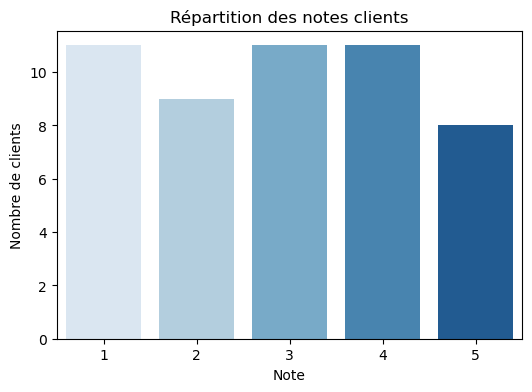

In [50]:
plt.figure(figsize=(6,4))
sns.countplot(x="Note_Client", data=df, palette="Blues")
plt.title("Répartition des notes clients")
plt.xlabel("Note")
plt.ylabel("Nombre de clients")
plt.show()


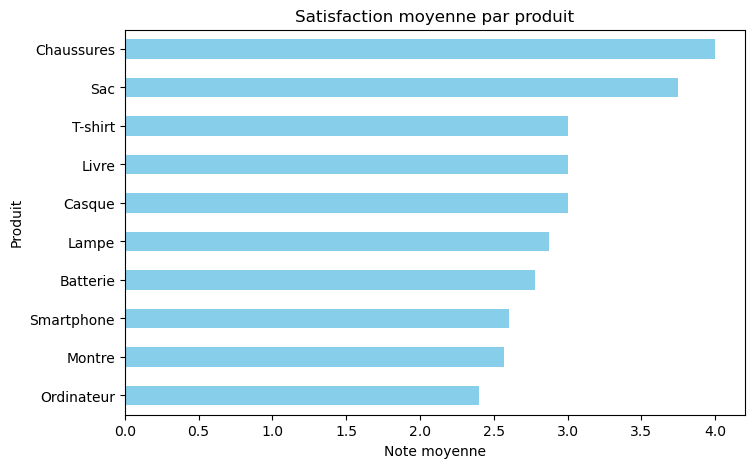

In [54]:
moy_notes = df.groupby("Produit")["Note_Client"].mean().sort_values()

plt.figure(figsize=(8,5))
moy_notes.plot(kind="barh", color="skyblue")
plt.title("Satisfaction moyenne par produit")
plt.xlabel("Note moyenne")
plt.ylabel("Produit")
plt.show()


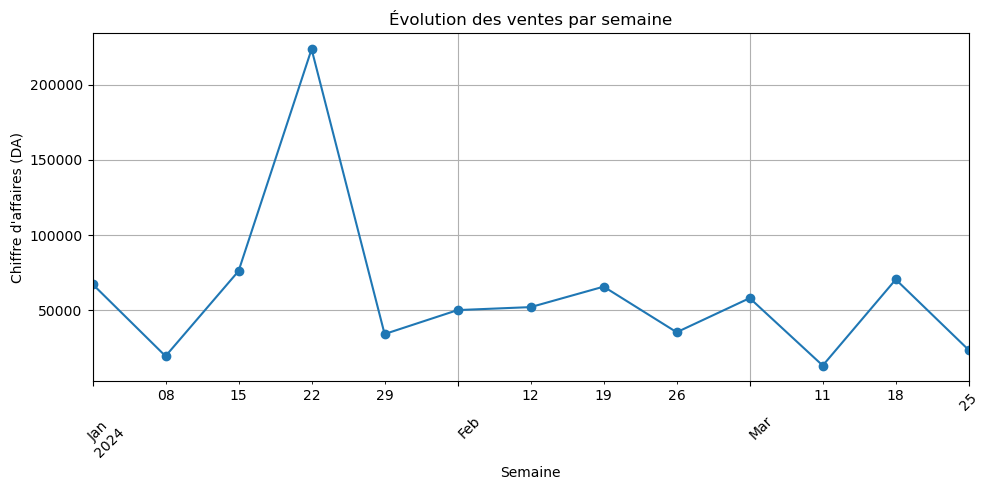

In [46]:
df["Semaine"] = pd.to_datetime(df["Date_Commande"]).dt.to_period("W").dt.start_time
df["Vente_Totale"] = df["Prix_unitaire"] * df["Quantité"]

ventes_par_semaine = df.groupby("Semaine")["Vente_Totale"].sum()

plt.figure(figsize=(10,5))
ventes_par_semaine.plot(marker='o')
plt.title("Évolution des ventes par semaine")
plt.xlabel("Semaine")
plt.ylabel("Chiffre d'affaires (DA)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



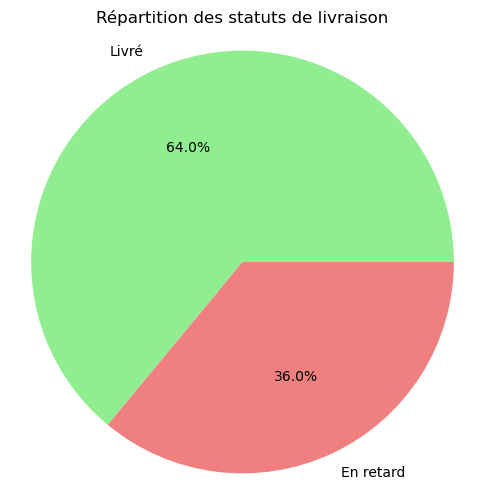

In [47]:
statuts = df["Statut_Livraison"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(statuts, labels=statuts.index, autopct='%1.1f%%', colors=["lightgreen", "lightcoral"])
plt.title("Répartition des statuts de livraison")
plt.axis("equal")
plt.show()


In [59]:
df["Vente_Totale"] = df["Prix_unitaire"] * df["Quantité"]
top_produits_ca = df.groupby("Produit")["Vente_Totale"].sum().sort_values(ascending=False)
print("Classement des produits par chiffre d'affaires :")
print(top_produits_ca)


Classement des produits par chiffre d'affaires :
Produit
Batterie      130439
Lampe         124445
Smartphone    111212
Montre        107192
Sac            67837
Casque         67464
Chaussures     66482
Ordinateur     61266
Livre          35280
T-shirt        18396
Name: Vente_Totale, dtype: int64
